### PROBLEM DEFINITION 
Nexus bank has conducted campaigns with the goal of accquiring deposits. In the last board meeting , the directors were unsatisfied witht their current sitution and need to optimize the operations at Nexus bank. They want to identify trends and patterns in customer behaviour to decipher if customer demographics such as age,educatiional level e.t.c influences customers attitude towards defaulting.


In [92]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from collections import Counter

In [93]:
# read csv file
n_b = pd.read_csv('bank.csv')

### EXPLORATORY DATA ANALYSIS (EDA)

In [3]:
# print the first rows
n_b.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
# print the bottom row
n_b.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [5]:
# Dimensionality (exploring the number of rows and columns)
n_b.shape

(45211, 17)

In [6]:
# Examine the features/columns of the data
n_b.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [7]:
# Investigate the data set for annomalies and data types
n_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
# Numerical Statiscal Analysis
n_b.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
# Categorical Statistical Analysis
n_b.describe(include=["object", "bool"])

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [10]:
# Missing Values
null_vals = n_b.isnull().sum()
null_vals

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

###  Visualizing relationships between the label and some key features

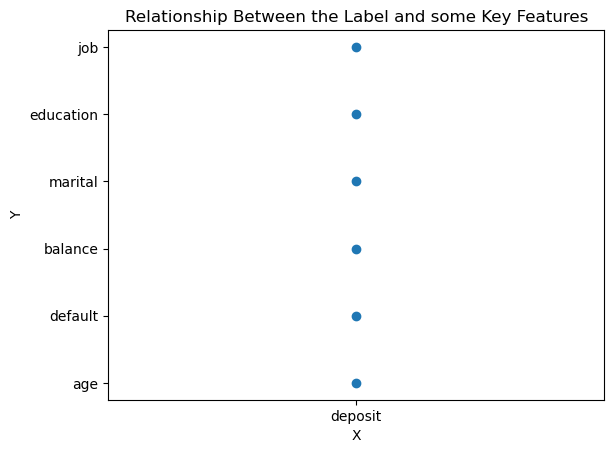

In [11]:
# Create a scatter plot

import matplotlib.pyplot as plt
x = ['deposit']
y = [0, 1, 2, 3, 4, 5]

plt.scatter(x * len(y), y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Relationship Between the Label and some Key Features')

plt.yticks(y, ['age', 'default', 'balance', 'marital', 'education', 'job'])

plt.show()

### Exploring correlations

/var/folders/gs/597bjtx917s63mvz0dzk8pgh0000gp/T/ipykernel_5097/404038209.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(n_b.corr(), annot = True, linewidths = 2, linecolor = 'white')


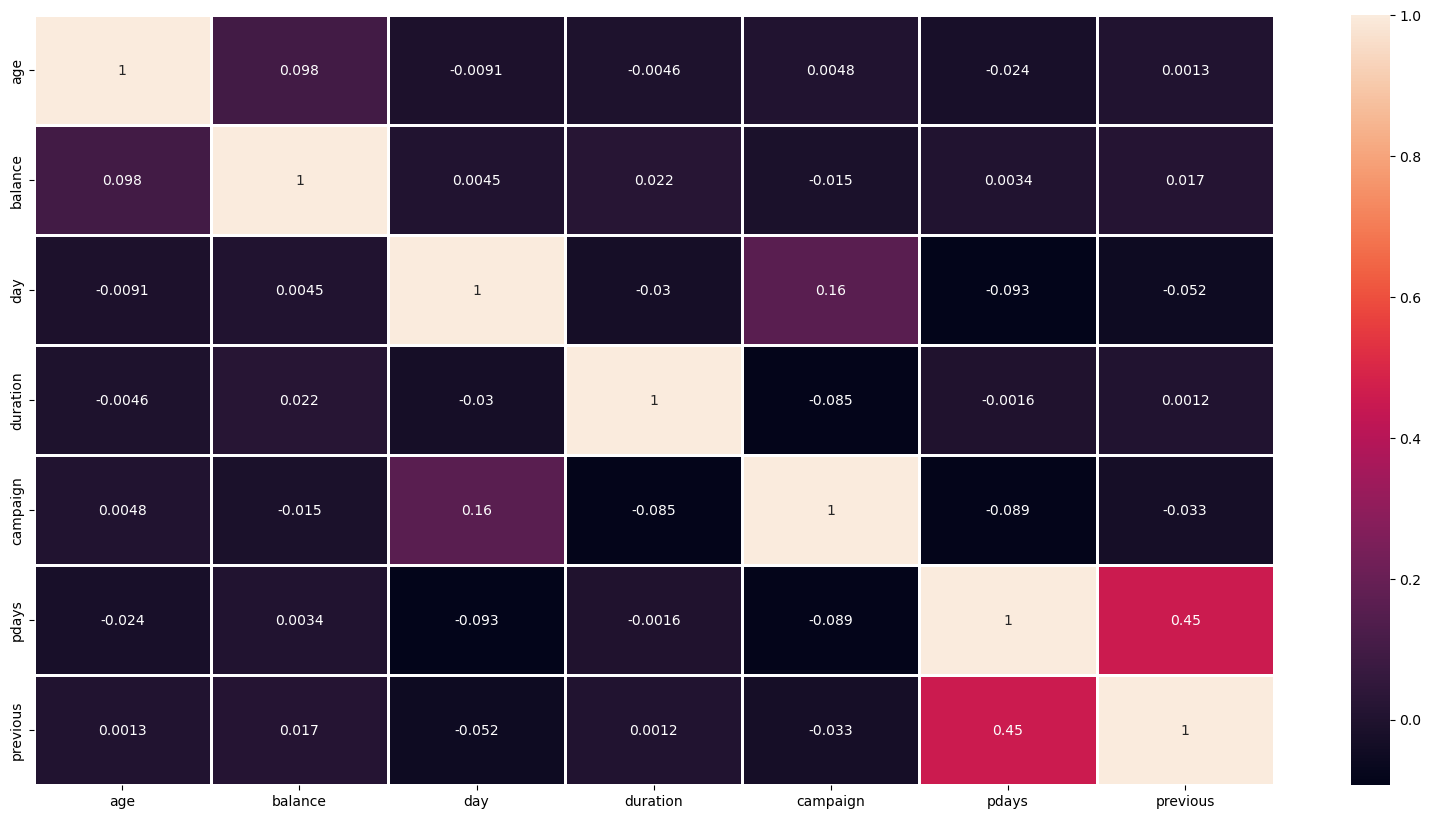

In [14]:
#Checking for correlation between the features and label

plt.figure(figsize = (20, 10))

sb.heatmap(n_b.corr(), annot = True, linewidths = 2, linecolor = 'white')
plt.show()

/var/folders/gs/597bjtx917s63mvz0dzk8pgh0000gp/T/ipykernel_5097/1918677046.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = n_b.corr()


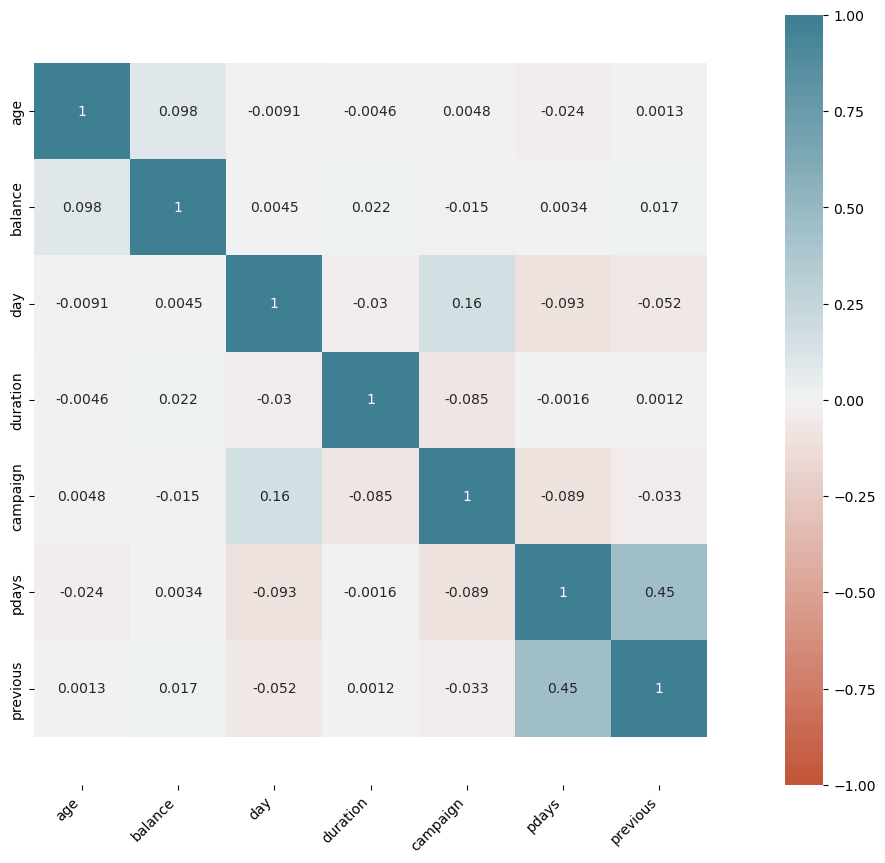

In [17]:
# Correlation of the features

corr = n_b.corr()

plt.figure(figsize=(20, 10))
ax = sb.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sb.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

### Univariate Analysis

In [18]:
#Numerical column/feature = numerical visualization techniques
#Categorical column/feature = categorical visualization techniques

n_b.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

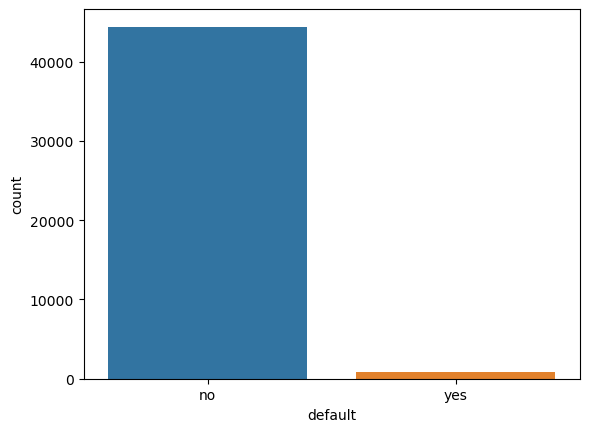

In [21]:
ax = sb.countplot(x=n_b["default"], order=n_b["default"].value_counts(ascending=False).index);

In [27]:
n_b["default"].value_counts()

no     44396
yes      815
Name: default, dtype: int64

###### Default: This feature indicates whether the customer has previously defaulted on a loan or credit card payment, which could be "yes" or "no“.  This shows that there are more customers who do not default than customers who do.

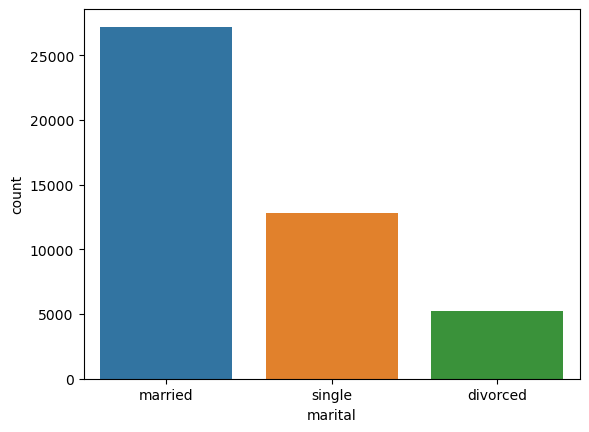

In [25]:
ax = sb.countplot(x=n_b["marital"], order=n_b["marital"].value_counts(ascending=False).index);


In [28]:
n_b["marital"].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

###### Marital feature indicates the marital status of the customer, which could be "married," "divorced," or "single". This shows that most of the banks customers are married followed by single and the least customers are divorced.

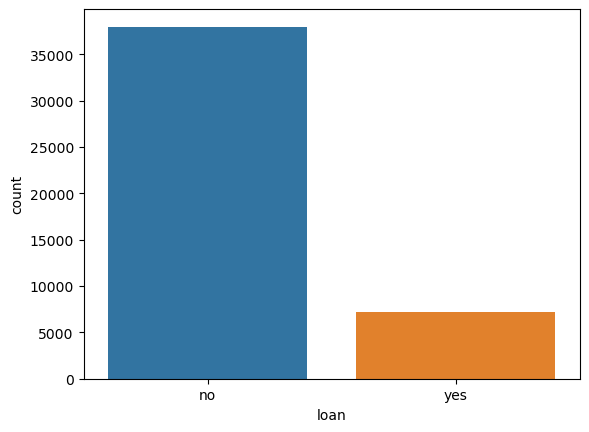

In [26]:
ax = sb.countplot(x=n_b["loan"], order=n_b["loan"].value_counts(ascending=False).index);

In [32]:
n_b["loan"].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

####  Loan feature indicates whether the customer has a personal loan or not, which could be "yes" or "no." The fig. above shows that the number of the bank's customers without personal loan are more in number than those with personal loans.

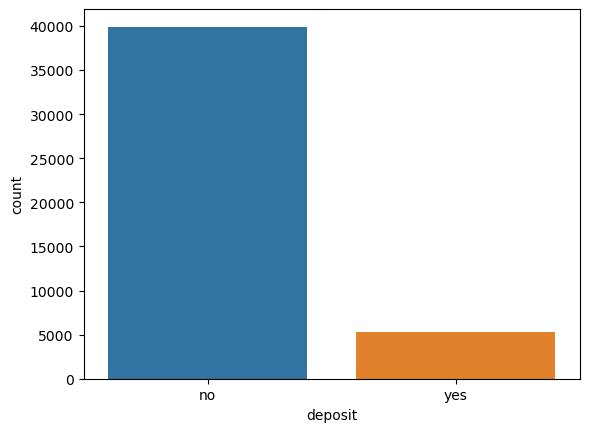

In [30]:
ax = sb.countplot(x=n_b["deposit"], order=n_b["deposit"].value_counts(ascending=False).index);

In [34]:
n_b["deposit"].value_counts()

no     39922
yes     5289
Name: deposit, dtype: int64

#### Deposit feature indicates whether the customer has subscribed to a term deposit, which could be "yes" or "no." The fig above shows that there are less people who subscribed to a term deposit than people who did.

### Multivariate Analysis 

In [36]:
n_b.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

/var/folders/gs/597bjtx917s63mvz0dzk8pgh0000gp/T/ipykernel_5097/2764011464.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sb.barplot(x= 'marital', y='age', data = n_b, hue= 'deposit', ci=0).set_title('age distribution by education filtered by deposit')


Text(0.5, 1.0, 'age distribution by education filtered by deposit')

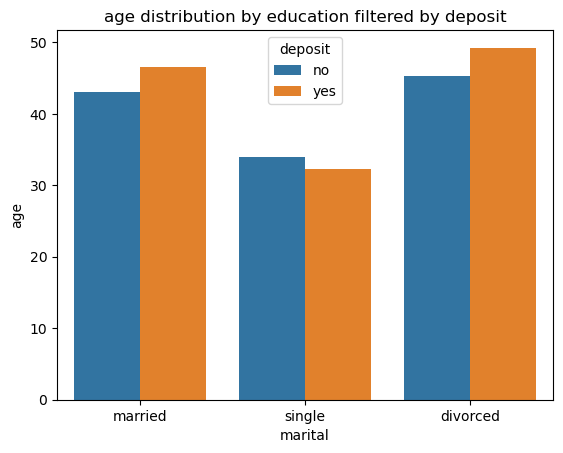

In [41]:
#
sb.barplot(x= 'marital', y='age', data = n_b, hue= 'deposit', ci=0).set_title('age distribution by education filtered by deposit')

#### From the fig. above we can tell that customer’s who are divorced and above 45 years of age have the highest number of deposit subscription, then customer’s who are 45 years and below but are married and the least number of deposit subscription goes to customers who are 35 years and below and are single.

/var/folders/gs/597bjtx917s63mvz0dzk8pgh0000gp/T/ipykernel_5097/4281173233.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sb.barplot(x= 'housing', y='age', data = n_b, hue= 'deposit', ci=0).set_title('age distribution by housing filtered by deposit')


Text(0.5, 1.0, 'age distribution by housing filtered by deposit')

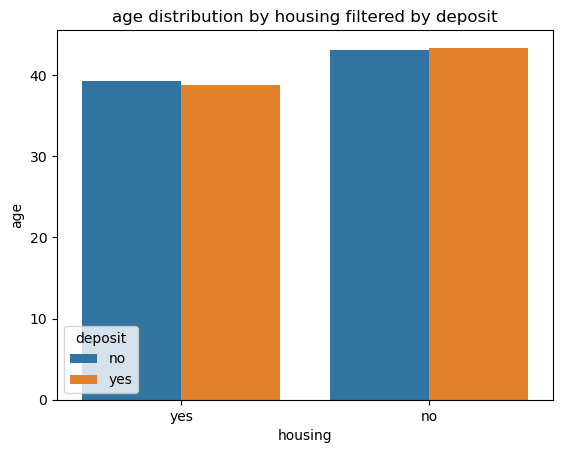

In [46]:
sb.barplot(x= 'housing', y='age', data = n_b, hue= 'deposit', ci=0).set_title('age distribution by housing filtered by deposit')

#### It is shown from the fig above that we have more customers who did not subscribe to both deposit and other loans(housing). 

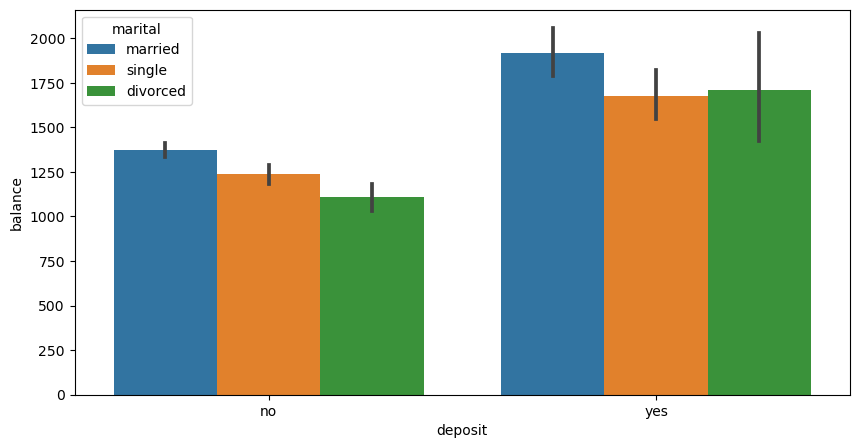

In [47]:
plt.figure(figsize=(10,5))
topten = n_b["balance"].value_counts().head(10)
sb.barplot(x="deposit", y="balance", data=n_b, hue="marital");

#### From the fig above, we can tell that we have a higher number of married customers who subscribed to deposits and they also have the highest balance.

### Encoding Categorical Variables

In [61]:
#One Hot Encoder

from sklearn.preprocessing import OneHotEncoder

In [63]:
one_hot = pd.get_dummies(n_b['job'])
n_b.drop('job', axis=1, inplace=True)
n_b = n_b.join(one_hot)

n_b.head()

,age,education,default,balance,housing,loan,contact,day,month,duration,...,2,3,4,5,6,7,8,9,10,11
0,58,tertiary,no,2143,yes,no,unknown,5,may,261,...,0,0,1,0,0,0,0,0,0,0
1,44,secondary,no,29,yes,no,unknown,5,may,151,...,0,0,0,0,0,0,0,1,0,0
2,33,secondary,no,2,yes,yes,unknown,5,may,76,...,1,0,0,0,0,0,0,0,0,0
3,47,unknown,no,1506,yes,no,unknown,5,may,92,...,0,0,0,0,0,0,0,0,0,0
4,33,unknown,no,1,no,no,unknown,5,may,198,...,0,0,0,0,0,0,0,0,0,1


In [64]:
one_hot = pd.get_dummies(n_b['default'])
n_b.drop('default', axis=1, inplace=True)
n_b = n_b.join(one_hot)

n_b.head()

,age,education,balance,housing,loan,contact,day,month,duration,campaign,...,4,5,6,7,8,9,10,11,no,yes
0,58,tertiary,2143,yes,no,unknown,5,may,261,1,...,1,0,0,0,0,0,0,0,1,0
1,44,secondary,29,yes,no,unknown,5,may,151,1,...,0,0,0,0,0,1,0,0,1,0
2,33,secondary,2,yes,yes,unknown,5,may,76,1,...,0,0,0,0,0,0,0,0,1,0
3,47,unknown,1506,yes,no,unknown,5,may,92,1,...,0,0,0,0,0,0,0,0,1,0
4,33,unknown,1,no,no,unknown,5,may,198,1,...,0,0,0,0,0,0,0,1,1,0


In [65]:
one_hot = pd.get_dummies(n_b['education'])
n_b.drop('education', axis=1, inplace=True)
n_b = n_b.join(one_hot)

n_b.head()

,age,balance,housing,loan,contact,day,month,duration,campaign,pdays,...,8,9,10,11,no,yes,primary,secondary,tertiary,unknown
0,58,2143,yes,no,unknown,5,may,261,1,-1,...,0,0,0,0,1,0,0,0,1,0
1,44,29,yes,no,unknown,5,may,151,1,-1,...,0,1,0,0,1,0,0,1,0,0
2,33,2,yes,yes,unknown,5,may,76,1,-1,...,0,0,0,0,1,0,0,1,0,0
3,47,1506,yes,no,unknown,5,may,92,1,-1,...,0,0,0,0,1,0,0,0,0,1
4,33,1,no,no,unknown,5,may,198,1,-1,...,0,0,0,1,1,0,0,0,0,1


### Creating Features from Existing Features

In [78]:
# Group Customer Age     # x-signifies the age of the customer
def age_group(x):
    if x <= 20:
        return "<=20 Young Adult"
    elif x <= 40:
        return "20-40 Adult"
    elif x <= 60:
        return "41-60 Old Adult"
    else:
        return ">=61 Elders"

n_b["age_group"] = n_b["age"].apply(age_group)
n_b.head(5)

,age,balance,day,month,duration,campaign,pdays,previous,poutcome,deposit,...,10,11,no,yes,primary,secondary,tertiary,unknown,age_group,campaign_g
0,58,2143,5,may,261,1,-1,0,unknown,no,...,0,0,1,0,0,0,1,0,41-60 Old Adult,<=10 Best
1,44,29,5,may,151,1,-1,0,unknown,no,...,0,0,1,0,0,1,0,0,41-60 Old Adult,<=10 Best
2,33,2,5,may,76,1,-1,0,unknown,no,...,0,0,1,0,0,1,0,0,20-40 Adult,<=10 Best
3,47,1506,5,may,92,1,-1,0,unknown,no,...,0,0,1,0,0,0,0,1,41-60 Old Adult,<=10 Best
4,33,1,5,may,198,1,-1,0,unknown,no,...,0,1,1,0,0,0,0,1,20-40 Adult,<=10 Best


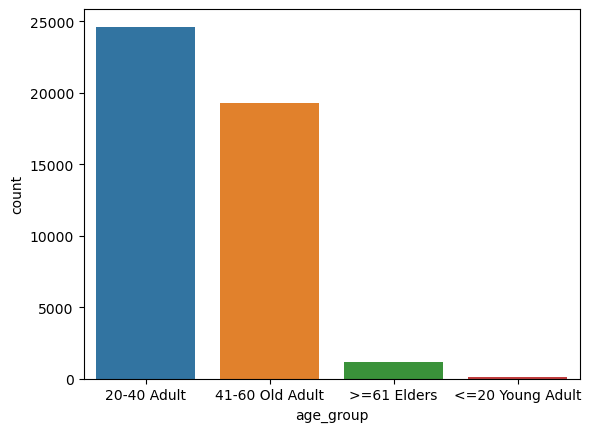

In [79]:
ax = sb.countplot(x=n_b["age_group"], order=n_b["age_group"].value_counts(ascending=False).index);

In [77]:
def campaign_g(x):
    if x <= 10:
        return "<=10 Best"
    elif x <= 30:
        return "11-30 Better"
    elif x <= 50:
        return "31-50 Good"
    else:
        return ">=51 Least"

n_b["campaign_g"] = n_b["campaign"].apply(campaign_g)
n_b.head(5)

,age,balance,day,month,duration,campaign,pdays,previous,poutcome,deposit,...,10,11,no,yes,primary,secondary,tertiary,unknown,age_group,campaign_g
0,58,2143,5,may,261,1,-1,0,unknown,no,...,0,0,1,0,0,0,1,0,41-60 Old Adult,<=10 Best
1,44,29,5,may,151,1,-1,0,unknown,no,...,0,0,1,0,0,1,0,0,41-60 Old Adult,<=10 Best
2,33,2,5,may,76,1,-1,0,unknown,no,...,0,0,1,0,0,1,0,0,20-40 Adult,<=10 Best
3,47,1506,5,may,92,1,-1,0,unknown,no,...,0,0,1,0,0,0,0,1,41-60 Old Adult,<=10 Best
4,33,1,5,may,198,1,-1,0,unknown,no,...,0,1,1,0,0,0,0,1,20-40 Adult,<=10 Best


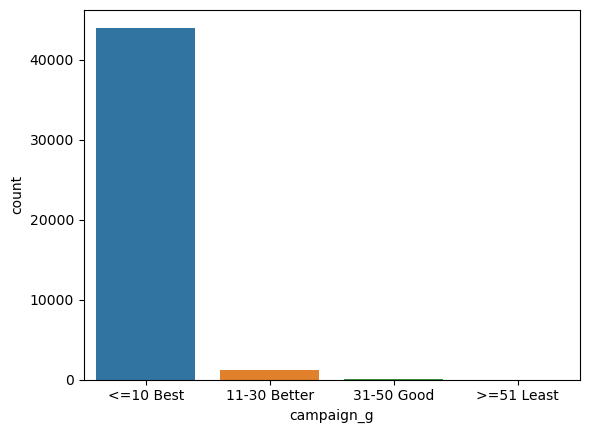

In [80]:
sb.countplot(x="campaign_g", data=n_b);

### Model Selection, Training and Validation

In [94]:
#feature selection
y = n_b['deposit'].values
x = n_b[['job', 'marital', 'age', 'education', 'loan', 'campaign', 'default']]

In [102]:
# import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size = 0.2, random_state= 30)

model.fit(x_train, y_train)

ValueError: could not convert string to float: 'unemployed'

In [103]:
y_pred = model.predict(x_test)

y_pred

ValueError: could not convert string to float: 'blue-collar'

In [104]:
model.score(x_test, y_test)

ValueError: could not convert string to float: 'blue-collar'

In [105]:
print(f'Accuracy Testing model = {model.score(x_test, y_test)}')

ValueError: could not convert string to float: 'blue-collar'

In [106]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

NameError: name 'y_pred' is not defined

In [107]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
#confusion matrix

y_pred = model.predict(x_test)

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sb.heatmap(confusion_matrix, annot=True)

ValueError: could not convert string to float: 'blue-collar'

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

bal_deposit = n_b.groupby("balance")["deposit"].sum().reset_index()

sb.barplot(x='balance', data=bal_deposit, y='deposit', ax=axs[0,0])
ax[0,0].set_title("Total deposit by balance")